In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
import seaborn as sns

In [3]:
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px

In [4]:


# Laden der Datei in ein Pandas DataFrame
datei_path = r"C:\Users\Kunde\Desktop\BNT_Technikerschule\Dr. Movsessian\Projekt Windkraftanlage\Features_for_SHAP32rpm_repaierd.txt"
df = pd.read_csv(datei_path)


# Anzeige in Tabs (Jupyter Widgets)
## Mit Jupyter Widgets können Sie die Spalten in Tabs aufteilen, um die Anzeige zu erleichter

In [5]:
def display_df_in_tabs(df, chunk_size=10):
    num_chunks = (len(df.columns) + chunk_size - 1) // chunk_size
    for i in range(num_chunks):
        start = i * chunk_size
        end = min((i + 1) * chunk_size, len(df.columns))
        chunk = df.iloc[:, start:end]
        tab = widgets.Tab(children=[widgets.Output(layout=widgets.Layout(width='auto')) for _ in range(len(chunk.columns))],
                          titles=list(chunk.columns))
        for j, col in enumerate(chunk.columns):
            with tab.children[j]:
                display(chunk[col])
        display(tab)

display_df_in_tabs(df)



In [6]:

print("\n📊 Allgemeine Infos:")
df.info()




📊 Allgemeine Infos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cov1_1            2927 non-null   float64
 1   Cov1_2            2927 non-null   float64
 2   Cov1_4            2927 non-null   float64
 3   Cov1_5            2927 non-null   float64
 4   Cov1_7            2927 non-null   float64
 5   Cov1_8            2927 non-null   float64
 6   Cov1_10           2927 non-null   float64
 7   Cov1_11           2927 non-null   float64
 8   Cov2_2            2927 non-null   float64
 9   Cov2_4            2927 non-null   float64
 10  Cov2_5            2927 non-null   float64
 11  Cov2_7            2927 non-null   float64
 12  Cov2_8            2927 non-null   float64
 13  Cov2_10           2927 non-null   float64
 14  Cov2_11           2927 non-null   float64
 15  Cov4_4            2927 non-null   float64
 16  Cov4_5            292

In [7]:
print("\n📈 Statistische Übersicht:")
df.describe()


📈 Statistische Übersicht:


,Cov1_1,Cov1_2,Cov1_4,Cov1_5,Cov1_7,Cov1_8,Cov1_10,Cov1_11,Cov2_2,Cov2_4,...,DC2_RPM,Wind_Direction,Temperature,Preciptation,Generator_on_off,Power_kW,Pitch_deg,Yaw,Azimuth,novelty_index
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2168.000000,2168.000000,2927.000000,2168.000000,2927.000000,2927.000000
mean,1747.931863,-2.260068,317.196271,-28.444858,46.515793,-159.859453,10.256604,18.023993,95.290987,65.304500,...,31.982444,219.890276,2.618653,0.009267,0.984588,-0.146232,-0.365317,9.947981,10.156601,6.983072
std,199.708307,39.504559,151.510188,19.806876,69.737599,27.411937,20.140408,9.595882,12.554723,30.339935,...,0.251218,80.914737,2.770315,0.071789,0.120005,0.431149,0.340793,0.661750,102.590188,3.508187
min,989.239237,-145.223071,-78.720347,-96.682045,-140.913708,-304.416136,-65.375506,-14.446204,65.348420,7.278890,...,30.000287,0.131618,-3.371019,-0.000454,0.000000,-0.880806,-1.426433,4.000000,-179.463434,2.764926
25%,1624.058779,-32.330924,189.466139,-41.199322,-10.279779,-177.269372,-5.901096,12.420366,85.870861,42.781594,...,32.009364,191.184350,0.959786,0.000000,1.000000,-0.214719,-0.484065,10.007517,-74.649448,4.726142
50%,1750.020173,-5.972418,321.332371,-28.991283,49.155240,-161.358001,10.987156,18.572368,94.012226,59.270103,...,32.025193,229.806000,2.269189,0.005649,1.000000,-0.197195,-0.263347,10.017120,13.881518,6.049983
75%,1876.425325,29.254731,442.783770,-16.136016,108.141518,-143.200508,25.728132,24.983788,103.875741,82.512411,...,32.030999,278.209200,4.478815,0.005802,1.000000,-0.175742,-0.124634,10.041622,100.276608,7.826569
max,2924.941275,106.863926,733.283649,51.777710,189.242296,-54.493735,73.917371,41.616833,145.757134,183.928483,...,32.102752,359.859600,11.945510,1.000000,1.000000,7.898488,-0.000035,10.136890,179.890022,31.580461


In [8]:
df_2=df
print(df_2["Generator_on_off"].value_counts())


Generator_on_off
1.000000    2127
0.000000      31
0.888542       1
0.807813       1
0.701042       1
0.854167       1
0.658333       1
0.752083       1
0.475521       1
0.744271       1
0.857812       1
0.846354       1
Name: count, dtype: int64


# Bereinigen der Generator_on_off zu o und 1

In [9]:
df['Generator_on_off'] = (df['Generator_on_off'] > 0.5).astype(int)


In [10]:
df_2=df
print(df_2["Generator_on_off"].value_counts())

Generator_on_off
1    2136
0     791
Name: count, dtype: int64


In [11]:
df.columns

Index(['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10',
       'Cov1_11', 'Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10',
       'Cov2_11', 'Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11',
       'Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11', 'Cov7_7', 'Cov7_8',
       'Cov7_10', 'Cov7_11', 'Cov8_8', 'Cov8_10', 'Cov8_11', 'Cov10_10',
       'Cov10_11', 'Cov11_11', 'WindSpeed', 'DC1_RPM', 'DC2_RPM',
       'Wind_Direction', 'Temperature', 'Preciptation', 'Generator_on_off',
       'Power_kW', 'Pitch_deg', 'Yaw', 'Azimuth', 'novelty_index'],
      dtype='object')

In [12]:
# 📌 Fehlende Werte prüfen
print("\n❓ Fehlende Werte pro Spalte:")
print(df.isnull().sum())

# 📌 Falls es fehlende Werte gibt -> mit Mittelwert füllen (optional)
df.fillna(df.mean(), inplace=True)


❓ Fehlende Werte pro Spalte:
Cov1_1                0
Cov1_2                0
Cov1_4                0
Cov1_5                0
Cov1_7                0
Cov1_8                0
Cov1_10               0
Cov1_11               0
Cov2_2                0
Cov2_4                0
Cov2_5                0
Cov2_7                0
Cov2_8                0
Cov2_10               0
Cov2_11               0
Cov4_4                0
Cov4_5                0
Cov4_7                0
Cov4_8                0
Cov4_10               0
Cov4_11               0
Cov5_5                0
Cov5_7                0
Cov5_8                0
Cov5_10               0
Cov5_11               0
Cov7_7                0
Cov7_8                0
Cov7_10               0
Cov7_11               0
Cov8_8                0
Cov8_10               0
Cov8_11               0
Cov10_10              0
Cov10_11              0
Cov11_11              0
WindSpeed             0
DC1_RPM               0
DC2_RPM               0
Wind_Direction        0
Temperatur

# Feature- und Label-Spalten definieren: Definiere die Feature- und Label-Spalten.

In [13]:
feature_columns = [col for col in df.columns if col not in ['novelty_index', 'Generator_on_off']]
label_column = 'novelty_index'  # Falls es eine bekannte "Schadensklasse" gibt (1 = Anomalie, 0 = Gesund)




# 🔹 4. Normalisierung der Daten

In [14]:
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[feature_columns] = scaler.fit_transform(df[feature_columns])

In [19]:
df_normalized

,Cov1_1,Cov1_2,Cov1_4,Cov1_5,Cov1_7,Cov1_8,Cov1_10,Cov1_11,Cov2_2,Cov2_4,...,DC2_RPM,Wind_Direction,Temperature,Preciptation,Generator_on_off,Power_kW,Pitch_deg,Yaw,Azimuth,novelty_index
0,-0.717358,0.450638,-0.546826,-0.038076,-1.093025,-0.531832,-0.246411,-0.501913,0.617657,0.370724,...,0.025490,1.010220,-0.563239,-0.048276,1,-0.111220,-1.306359,0.120320,0.675489,6.079959
1,0.570193,0.326776,-0.198176,1.380743,-0.787369,0.596639,0.351869,-1.308239,0.010364,0.235043,...,0.049162,1.122388,-0.582414,-0.048276,1,-0.109078,-1.064490,0.068799,1.549598,6.131423
2,0.286492,0.157032,0.835460,-0.285135,1.301717,-0.193051,1.161660,1.554666,0.972124,-0.105311,...,-0.106638,1.070319,-0.586609,-0.048276,1,-0.108735,-2.600972,0.074320,0.085054,6.508935
3,-0.303606,-1.000097,1.207171,-0.263699,0.531931,1.672995,1.287116,-0.354601,-1.141057,-1.166664,...,-0.401507,1.185310,-0.601176,-0.048276,1,-0.108328,-2.909166,0.119460,-0.443842,6.365396
4,-0.589937,-0.944818,-0.351051,-0.145600,-0.963442,0.505153,0.187100,-1.174939,-0.535700,-0.325942,...,-1.368416,1.076832,-0.620440,-0.048276,1,-0.110835,-2.913692,0.154831,-0.512486,6.319523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,0.892276,0.616187,-0.933027,-0.877731,0.055989,-1.337409,-1.497290,-0.082724,0.874007,0.264219,...,0.170153,0.067907,-0.160093,-0.048276,1,-0.155522,0.471541,0.133035,-0.445770,19.300004
2923,1.102406,0.104041,-0.523083,-0.613835,-0.136090,-0.458837,-1.381680,-0.586588,-0.233738,-0.381250,...,0.169171,0.068135,-0.160061,-0.048276,1,-0.155115,0.584729,0.128241,-0.440975,18.866672
2924,0.653294,0.493129,-0.021797,-0.272641,0.150056,0.079400,-1.234739,-1.049389,0.065284,-0.242112,...,0.171084,0.059176,-0.167719,-0.048276,1,-0.152844,-0.236881,0.130559,-0.364547,19.676828
2925,0.679411,1.480011,0.890941,-0.077424,0.883372,0.757953,-0.206683,-0.729257,0.881701,0.231485,...,0.175850,0.011690,-0.166356,-0.048276,1,-0.150724,-0.323846,0.126836,-0.036093,19.960807


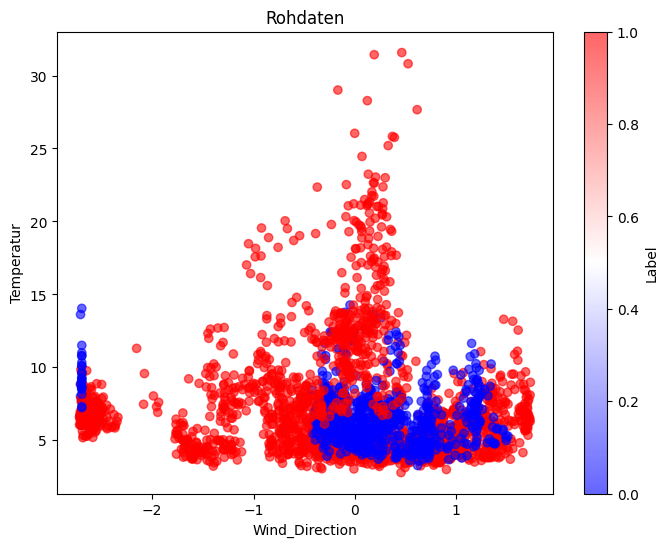

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df_normalized['Wind_Direction'], df_normalized["novelty_index"], c=df['Generator_on_off'], cmap='bwr', alpha=0.6)
plt.xlabel('Wind_Direction')
plt.ylabel('Temperatur')
plt.title('Rohdaten')
plt.colorbar(label='Label')
plt.show()

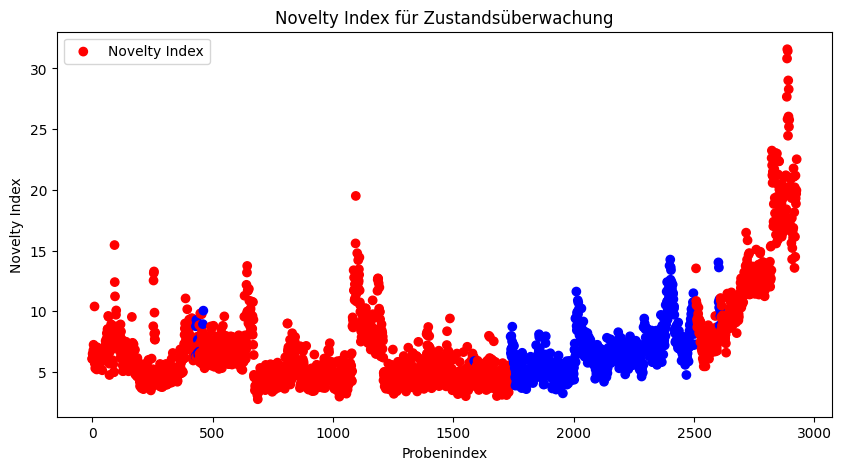

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(df_normalized)), df_normalized['novelty_index'], c=df_normalized['Generator_on_off'], cmap='bwr', label='Novelty Index')
#plt.axhline(y=optimal_threshold, color='green', linestyle='--', label='Schwellenwert')
plt.xlabel('Probenindex')
plt.ylabel('Novelty Index')
plt.title('Novelty Index für Zustandsüberwachung')
plt.legend()
plt.show()

In [26]:
healthy_data_normalized = df_normalized[df_normalized['Generator_on_off'] == 1]
mean_healthy = healthy_data_normalized[columns].mean().values

NameError: name 'columns' is not defined

In [15]:
# Beispiel: Schwellenwert für Novelty Index festlegen
threshold_novelty = df['novelty_index'].quantile(0.95)  # 95. Perzentil als Schwellenwert

# Schadensindex basierend auf Novelty Index berechnen
df['Schadensindex'] = (df['novelty_index'] > threshold_novelty).astype(int)

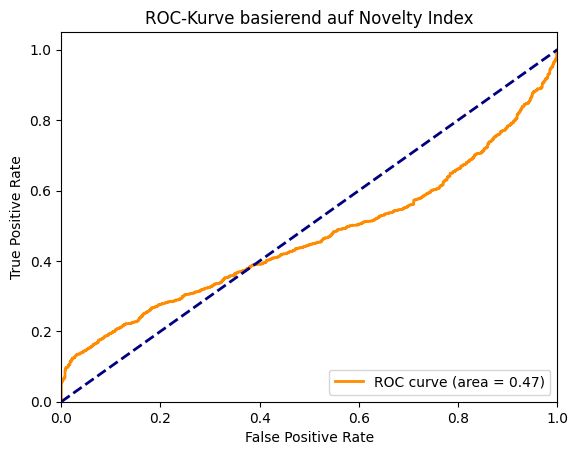

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Zielvariable
y_true = df['Generator_on_off']

# Vorhersage-Scores (z. B. Novelty Index oder Schadensindex)
y_scores = df['novelty_index']

# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# ROC-Kurve plotten
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Kurve basierend auf Novelty Index')
plt.legend(loc="lower right")
plt.show()

In [17]:
# Youden's J-Index berechnen
J = tpr - fpr
optimal_idx = J.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimaler Schwellenwert für Novelty Index: {optimal_threshold}")

Optimaler Schwellenwert für Novelty Index: 11.0526221054499


In [18]:
# Schadensindex basierend auf optimalem Schwellenwert
df['Schadensindex'] = (df['novelty_index'] > optimal_threshold).astype(int)

# Ergebnisse anzeigen
print(df[['novelty_index', 'Schadensindex']].head())

   novelty_index  Schadensindex
0       6.079959              0
1       6.131423              0
2       6.508935              0
3       6.365396              0
4       6.319523              0
